<a href="https://colab.research.google.com/github/davidnol/ET5003_SEM1_2021-2/blob/main/ET5003_KaggleCompetition_DavidNolan_20146744.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [1]:
#@title Current Date
Today = '2021-10-05' #@param {type:"date"}


# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [2]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

In [4]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [5]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [7]:
!pip install gpy

     |████████████████████████████████| 959 kB 11.4 MB/s 
     |████████████████████████████████| 71 kB 7.3 MB/s 
  Created wheel for gpy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565098 sha256=ccba606d57fa80b27ffd65ff00a688d40370cd598bf9fd37c5f29872cc6c89c5
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102565 sha256=9309a73e935d84cc4504e49e0911023dafa155766212e5e800826197311058a5
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built gpy paramz


In [8]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az
import seaborn as sns
from scipy import stats
from imblearn.combine import SMOTETomek 

In [9]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

In [10]:
RunningInCOLAB = 'google.colab' in str(get_ipython())

if RunningInCOLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    
    # Path, copy the path from your Drive
    Path = '/content/drive/MyDrive/Colab Notebooks/DavidNolan/'
    
else:
    Path = "./Data/"

# House price data from csv files
train_data = Path + 'HousePrice_Train.csv'
test_data = Path + 'HousePrice_Test.csv'

train = pd.read_csv(train_data)
print("Training data {}".format(train.shape))

# Test data
test = pd.read_csv(test_data)
print("Test data {}".format(test.shape))

Mounted at /content/drive
Training data (1638, 14)
Test data (702, 13)


In [11]:
train.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000


In [12]:
train.tail()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
1633,1634,12424903,Blackrock,1,2,C2,Built in c.1930 38 Stradbrook Road is a deligh...,"Parking,Gas Fired Central Heating,Alarm,Wheelc...",Extremely convenient location \nWheelchair acc...,53.292767,-6.166668,bungalow,64.00,500000
1634,1635,12383142,Blackrock,3,5,C1,An impressive three-story family home superbly...,NaN,Gas fired central heating with underfloor heat...,53.284975,-6.178685,detached,175.96,795000
1635,1636,12426975,Lucan,2,3,A3,DNG Lucan's leading estate agents are delighte...,NaN,None,53.351667,-6.435278,semi-detached,98.00,340000
1636,1637,12198921,Sandymount,8,8,D2,Holyrood Castle is a most distinctive 19th cen...,NaN,None,53.328997,-6.221030,detached,507.00,2500000
1637,1638,12314237,Shankill,2,2,E1,A superb opportunity awaits to acquire this be...,NaN,Turn key condition\nWood burning stove\nSlider...,53.231438,-6.125022,semi-detached,50.00,370000


In [13]:
train.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface,Price
count,1638.000000,1.638000e+03,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1.638000e+03
mean,819.500000,1.231930e+07,2.054335,3.043346,53.350473,-6.255086,169.540695,5.547196e+05
std,472.994186,1.447540e+05,1.241259,1.379650,0.076832,0.144430,1791.793934,5.652032e+05
min,1.000000,1.118567e+07,1.000000,1.000000,52.501856,-6.497000,3.400000,1.999500e+04
25%,410.250000,1.228104e+07,1.000000,2.000000,53.294261,-6.309613,73.000000,2.950000e+05
50%,819.500000,1.238055e+07,2.000000,3.000000,53.341386,-6.247780,97.050000,3.950000e+05
75%,1228.750000,1.240548e+07,3.000000,4.000000,53.382031,-6.193982,135.000000,5.950000e+05
max,1638.000000,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,72236.387140,8.900000e+06


In [14]:
# Find the number of nulls/NaNs in the dataset as a percentage to see if any columns need to be considered for removal
print("Read of missing values as percentage of data set")
train.isna().sum()*100/len(train)

Read of missing values as percentage of data set


Index             0.000000
ID                0.000000
Location          0.000000
Num_Bathrooms     0.000000
Num_Beds          0.000000
BER_class        15.323565
Description       0.000000
Services         64.774115
Features          0.000000
Latitude          0.000000
Longitude         0.000000
Type              0.000000
Surface           0.000000
Price             0.000000
dtype: float64

In [15]:
# Look for missing values
train.isna().sum()

Index               0
ID                  0
Location            0
Num_Bathrooms       0
Num_Beds            0
BER_class         251
Description         0
Services         1061
Features            0
Latitude            0
Longitude           0
Type                0
Surface             0
Price               0
dtype: int64

In [16]:
# Create new features from key words in Description
#data['renovated'] = np.where(data.loc[data['Features'].str.contains("renovated", case=False)], 1, 0) 

## Training set
renovated = train['Features'].str.contains("renovated|refurbished|turn key|showhouse", case=False)
attic = train['Features'].str.contains("attic", case=False)
large_garden = train['Features'].str.contains("acre|acres", case=False)
luas_dart = train['Features'].str.contains("luas|dart", case=False)
parking = train['Features'].str.contains("parking|garage", case=False)


train['Renovated']=renovated
train['Attic']=attic
train['Large_garden']=large_garden
train['Luas_dart']=luas_dart
train['Parking']=parking

## Testing set
renovated = test['Features'].str.contains("renovated|refurbished|turn key|showhouse", case=False)
attic = test['Features'].str.contains("attic", case=False)
large_garden = test['Features'].str.contains("acre|acres", case=False)
luas_dart = test['Features'].str.contains("luas|dart", case=False)
parking = test['Features'].str.contains("parking|garage", case=False)

test['Renovated']=renovated
test['Attic']=attic
test['Large_garden']=large_garden
test['Luas_dart']=luas_dart
test['Parking']=parking

In [17]:
train = train.drop(['ID', 'Services'], axis=1)
test = test.drop(['ID', 'Services'], axis=1)

In [18]:
train.head()

,Index,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price,Renovated,Attic,Large_garden,Luas_dart,Parking
0,1,Ongar,2,2,C3,DNG are delighted to present to the market no....,None,53.396659,-6.438791,apartment,67.00,195000,False,False,False,False,False
1,2,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000,False,True,False,False,False
2,3,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000,False,False,False,False,True
3,4,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000,False,True,False,False,True
4,5,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000,False,False,False,False,True


In [19]:
train['BER_class'].unique()

array(['C3', 'D1', 'A3', 'E1', nan, 'G', 'E2', 'C2',
       'SINo666of2006exempt', 'F', 'B2', 'C1', 'D2', 'B3', 'B1', 'A2',
       'A1'], dtype=object)

In [20]:
test['BER_class'].unique()

array(['C2', 'E1', 'G', 'A2', 'F', 'C3', nan, 'D1', 'B2', 'D2', 'E2',
       'C1', 'B3', 'A3', 'B1', 'SINo666of2006exempt'], dtype=object)

In [21]:
test.isna().sum()

Index              0
Location           0
Num_Bathrooms      0
Num_Beds           0
BER_class        108
Description        0
Features           0
Latitude           0
Longitude          0
Type               0
Surface            0
Renovated          0
Attic              0
Large_garden       0
Luas_dart          0
Parking            0
dtype: int64

In [22]:
#Fill in for missing BER_class values
train = train.fillna('none')
test = test.fillna('none')

In [23]:
train.isna().sum()

Index            0
Location         0
Num_Bathrooms    0
Num_Beds         0
BER_class        0
Description      0
Features         0
Latitude         0
Longitude        0
Type             0
Surface          0
Price            0
Renovated        0
Attic            0
Large_garden     0
Luas_dart        0
Parking          0
dtype: int64

In [24]:
test.isna().sum()

Index            0
Location         0
Num_Bathrooms    0
Num_Beds         0
BER_class        0
Description      0
Features         0
Latitude         0
Longitude        0
Type             0
Surface          0
Renovated        0
Attic            0
Large_garden     0
Luas_dart        0
Parking          0
dtype: int64

In [25]:
train['Num_Beds'].value_counts()

3     558
2     464
4     348
1     114
5     107
6      29
7      11
15      2
9       2
8       2
27      1
Name: Num_Beds, dtype: int64

In [26]:
train['Num_Bathrooms'].value_counts()

1     603
2     584
3     327
4      76
5      24
6      11
7       6
8       3
15      2
18      1
9       1
Name: Num_Bathrooms, dtype: int64

In [27]:
train['BER_class'].value_counts()

none                   251
D1                     182
D2                     173
C3                     154
C2                     144
C1                     133
E1                     110
G                      103
E2                     101
F                       89
B3                      78
B2                      48
A3                      37
SINo666of2006exempt     15
A2                      12
B1                       7
A1                       1
Name: BER_class, dtype: int64

In [28]:
train['Type'].value_counts()

semi-detached     458
apartment         431
terraced          299
detached          234
end-of-terrace    118
bungalow           48
duplex             33
townhouse          14
studio              2
site                1
Name: Type, dtype: int64

In [29]:
# Replace all ber values with equivalant decimal values. Ignore Nan.
train.dropna(subset=['BER_class'], inplace=True)
ber_features = train['BER_class'].sort_values().unique()

new_ber_values = np.arange(1, len(ber_features) + 1).tolist()

train['BER_class'].replace(to_replace=ber_features,
                                      value=new_ber_values,
                                      inplace=True)

test.dropna(subset=['BER_class'], inplace=True)
test['BER_class'].replace(to_replace=ber_features,
                                      value=new_ber_values,
                                      inplace=True)

In [30]:
train.head()

,Index,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price,Renovated,Attic,Large_garden,Luas_dart,Parking
0,1,Ongar,2,2,9,DNG are delighted to present to the market no....,None,53.396659,-6.438791,apartment,67.00,195000,False,False,False,False,False
1,2,North Strand,1,2,10,13 Northbrook Terrace is a charming red brick ...,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000,False,True,False,False,False
2,3,Stepaside,3,3,3,"Welcome to No. 6 Cotter Close, an immaculately...",Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000,False,False,False,False,True
3,4,Cabinteely,1,3,12,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000,False,True,False,False,True
4,5,Lusk,3,4,10,'Four Seasons' comes to the market as a wonder...,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000,False,False,False,False,True


In [31]:
train.tail()

,Index,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price,Renovated,Attic,Large_garden,Luas_dart,Parking
1633,1634,Blackrock,1,2,8,Built in c.1930 38 Stradbrook Road is a deligh...,Extremely convenient location \nWheelchair acc...,53.292767,-6.166668,bungalow,64.00,500000,True,False,False,False,True
1634,1635,Blackrock,3,5,7,An impressive three-story family home superbly...,Gas fired central heating with underfloor heat...,53.284975,-6.178685,detached,175.96,795000,False,False,False,True,True
1635,1636,Lucan,2,3,3,DNG Lucan's leading estate agents are delighte...,None,53.351667,-6.435278,semi-detached,98.00,340000,False,False,False,False,False
1636,1637,Sandymount,8,8,11,Holyrood Castle is a most distinctive 19th cen...,None,53.328997,-6.221030,detached,507.00,2500000,False,False,False,False,False
1637,1638,Shankill,2,2,12,A superb opportunity awaits to acquire this be...,Turn key condition\nWood burning stove\nSlider...,53.231438,-6.125022,semi-detached,50.00,370000,True,False,False,False,False


In [32]:
# Replace property type
replace_ptype_features = ['apartment', 'studio', 'duplex', 'townhouse', 'terraced', 'end-of-terrace',
                          'semi-detached', 'detached', 'bungalow', 'site' ]

replace_values = np.arange(1, len(replace_ptype_features) + 1).tolist()

# Apply basic conversion to the property type
train['Type'].replace(to_replace=replace_ptype_features,
                                      value=replace_values,
                                      inplace=True)

test['Type'].replace(to_replace=replace_ptype_features,
                                      value=replace_values,
                                      inplace=True)
# Remove columns with 0 - causes problems for the scalers used below
train = train[(train.Num_Beds>0)]

# Also drops all sites - this is intended
train = train[(train.Num_Bathrooms>0)]

train = train[(train.Price>0)]

In [33]:
train.head()

,Index,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price,Renovated,Attic,Large_garden,Luas_dart,Parking
0,1,Ongar,2,2,9,DNG are delighted to present to the market no....,None,53.396659,-6.438791,1,67.00,195000,False,False,False,False,False
1,2,North Strand,1,2,10,13 Northbrook Terrace is a charming red brick ...,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,5,95.97,425000,False,True,False,False,False
2,3,Stepaside,3,3,3,"Welcome to No. 6 Cotter Close, an immaculately...",Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,7,107.00,535000,False,False,False,False,True
3,4,Cabinteely,1,3,12,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,8,81.00,499000,False,True,False,False,True
4,5,Lusk,3,4,10,'Four Seasons' comes to the market as a wonder...,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,8,153.00,510000,False,False,False,False,True


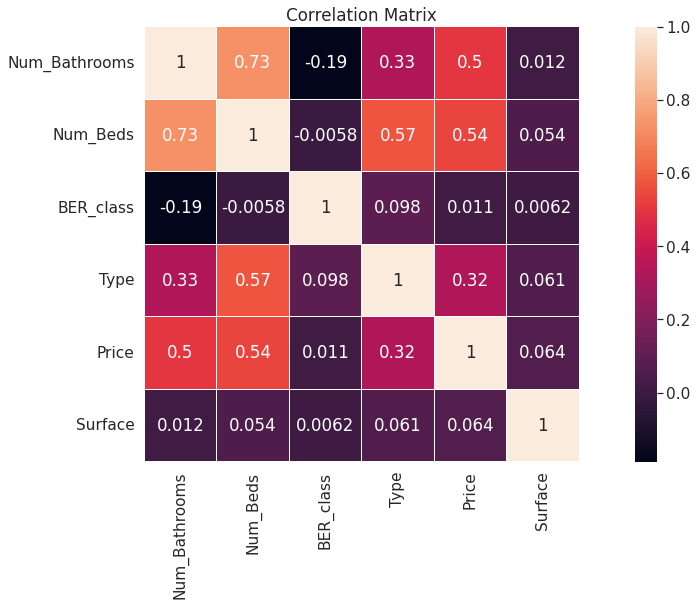

In [34]:
# Check relationships between numerical variables
import seaborn as sns
train[['Num_Bathrooms','Num_Beds','Price','Surface']].dropna()

sns.set(font_scale=1.4)
plt.figure(figsize=(20, 8))
plt.title('Correlation Matrix')
sns.heatmap(train[['Num_Bathrooms','Num_Beds','BER_class','Type','Price','Surface']].corr(),linewidths=0.01,
            square=True,annot=True)

Correlation of 0.73 between number of beds and number of bathrooms. 0.54 for number of beds and price.

In [35]:
# First filter out those rows which
# do not contain any data
train = train.dropna(how = 'any')
train.drop(train[train['Num_Beds'] == 0].index, inplace = True)
train.drop(train[train['Num_Bathrooms'] == 0].index, inplace = True)
print(train.select_dtypes(exclude=['object']).isna().sum())

Index            0
Num_Bathrooms    0
Num_Beds         0
BER_class        0
Latitude         0
Longitude        0
Type             0
Surface          0
Price            0
Renovated        0
Attic            0
Large_garden     0
Luas_dart        0
Parking          0
dtype: int64


In [36]:
# Function to Detection Outlier on one-dimentional datasets.
def remove_outliers(dframe, feature):
    '''Function to Detect / Remove Outliers'''
  
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(dframe[feature])
    random_data_mean = np.mean(dframe[feature])
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    dframe = dframe.drop(dframe[(dframe[feature] < lower_limit) | (dframe[feature] > upper_limit)].index)

    return dframe

def plot_box_hist(dframe, features):
    '''Function to plot Box / Histogram pair for any feature'''
    no_feats = len(features)
  
    figH = plt.figure(figsize=(30,no_feats*5))

    for i in range(0, no_feats): 
        ax1 = figH.add_subplot(no_feats, 2, (i*2)+1)
        ax1.set_title("Boxplot of "+features[i])
        dframe.boxplot(column=[features[i]])

        ax2 = figH.add_subplot(no_feats, 2, (i*2)+2)
        ax2.set_title("Histogram of "+features[i])
        dframe[features[i]].hist(bins=20)

    plt.show()

Analysis of outliers


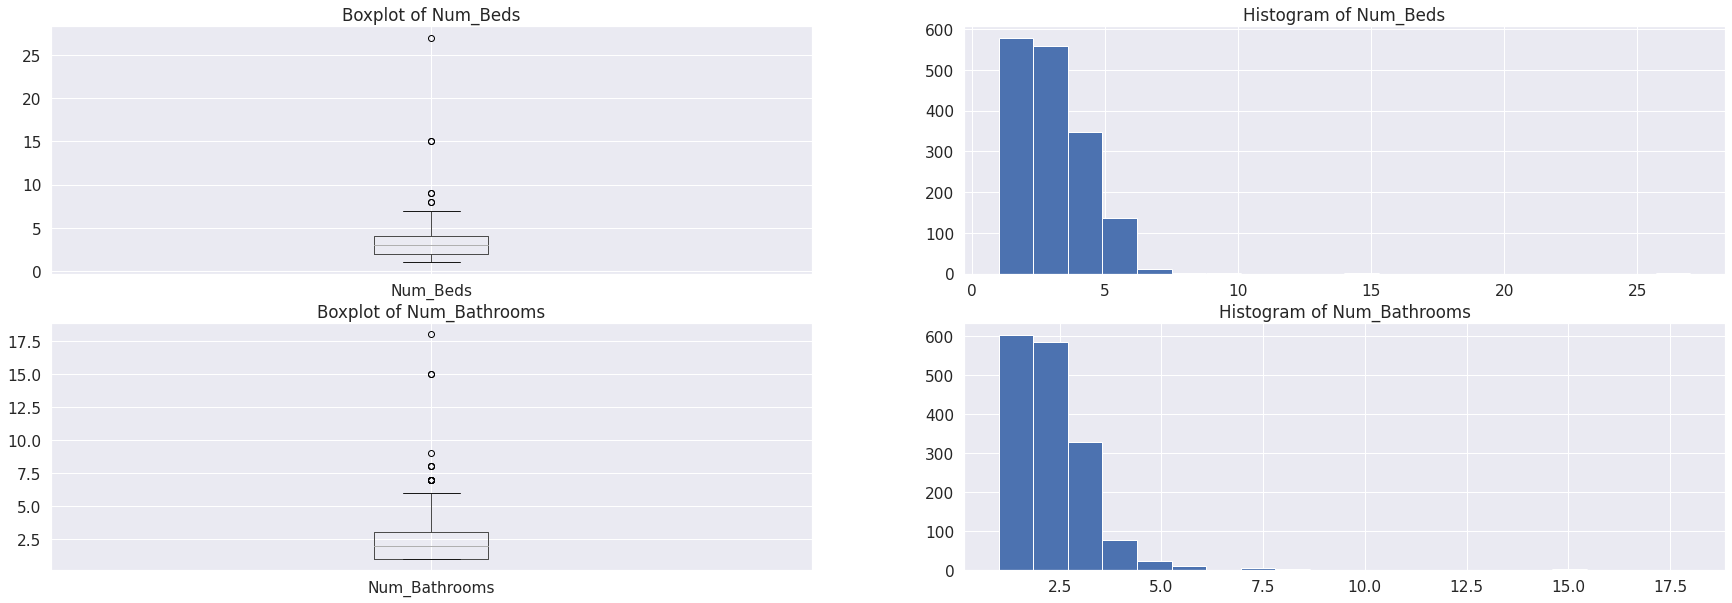

(1638, 17)
After outliers have been removed


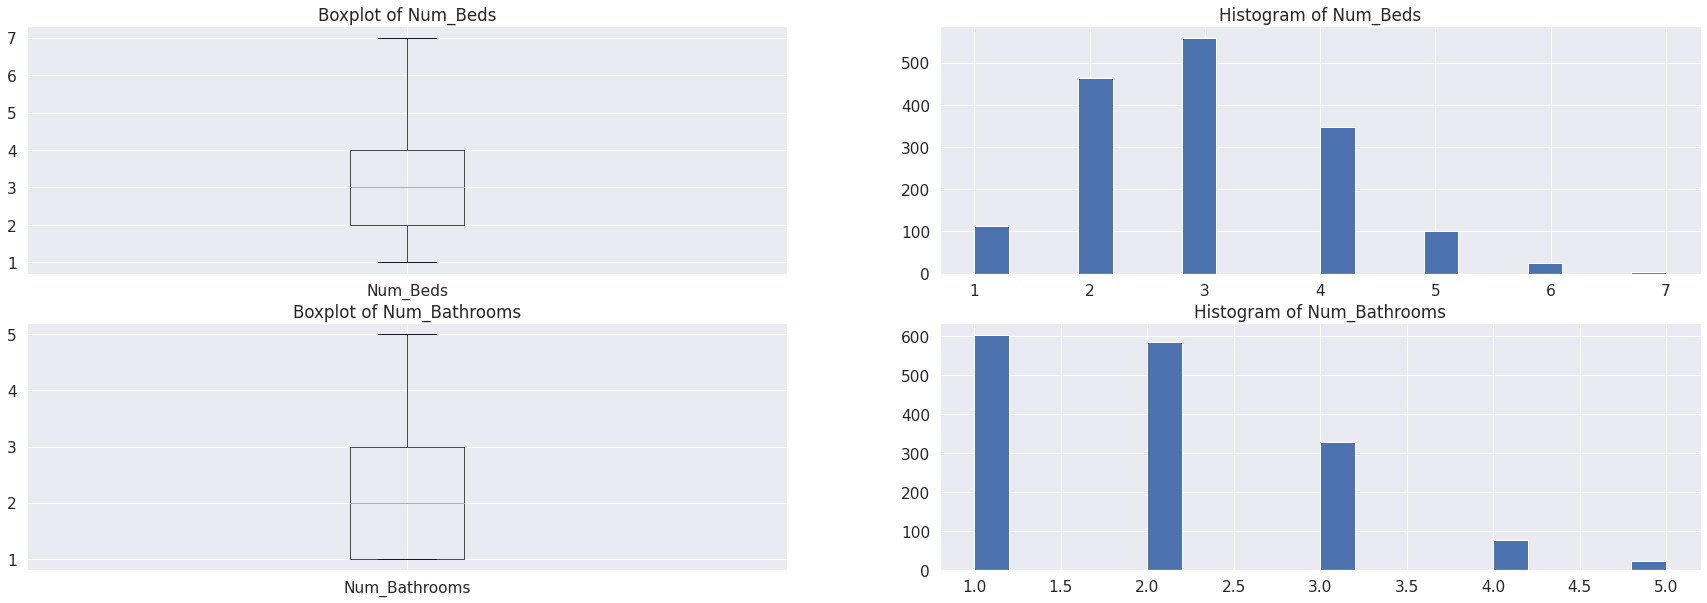

(1613, 17)


In [37]:
#Select features to include in plots
include_featues = ['Num_Beds','Num_Bathrooms']

#run print function
print("Analysis of outliers")
plot_box_hist(train, include_featues)
print(train.shape)

print("After outliers have been removed")
for i in range(0, len(include_featues)): 
    train = remove_outliers(train,include_featues[i])

#run print function
plot_box_hist(train, include_featues)
print(train.shape)

Analysis of outliers


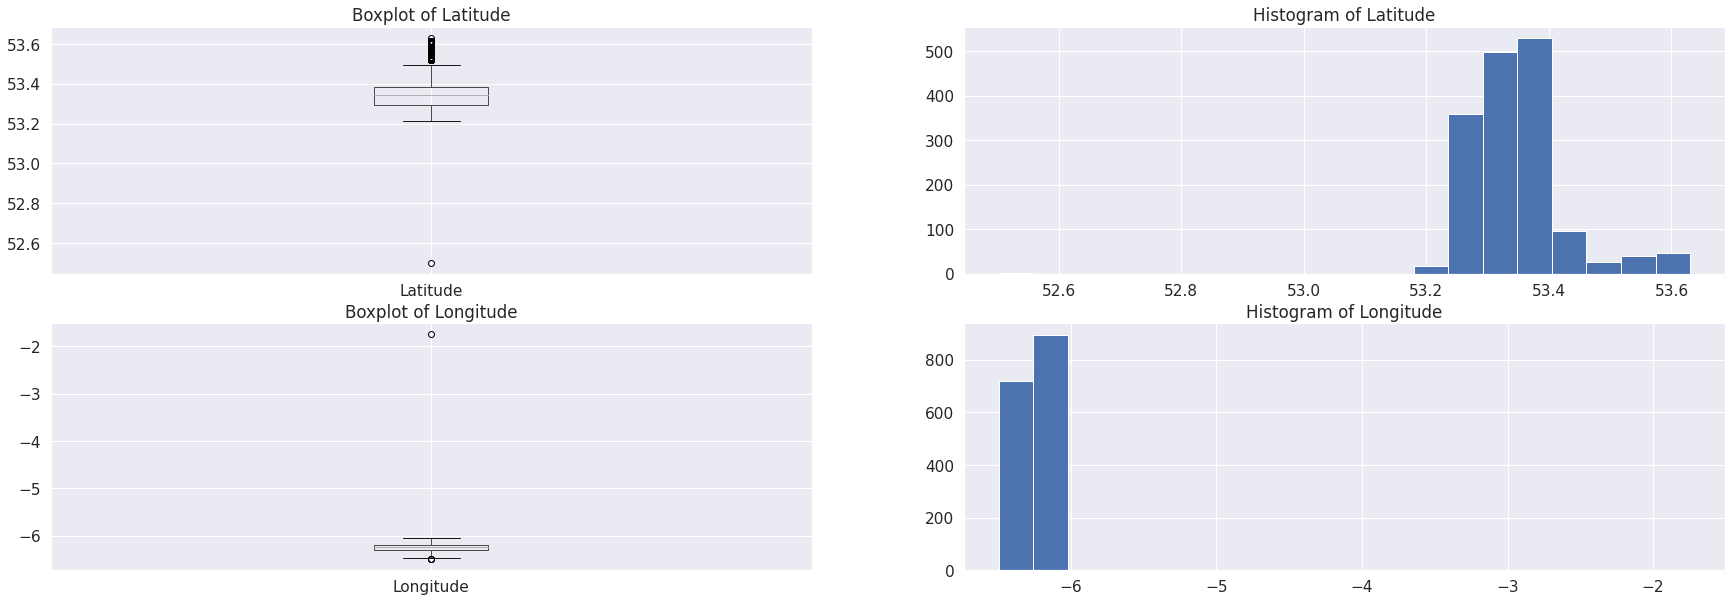

(1613, 17)
After outliers have been removed


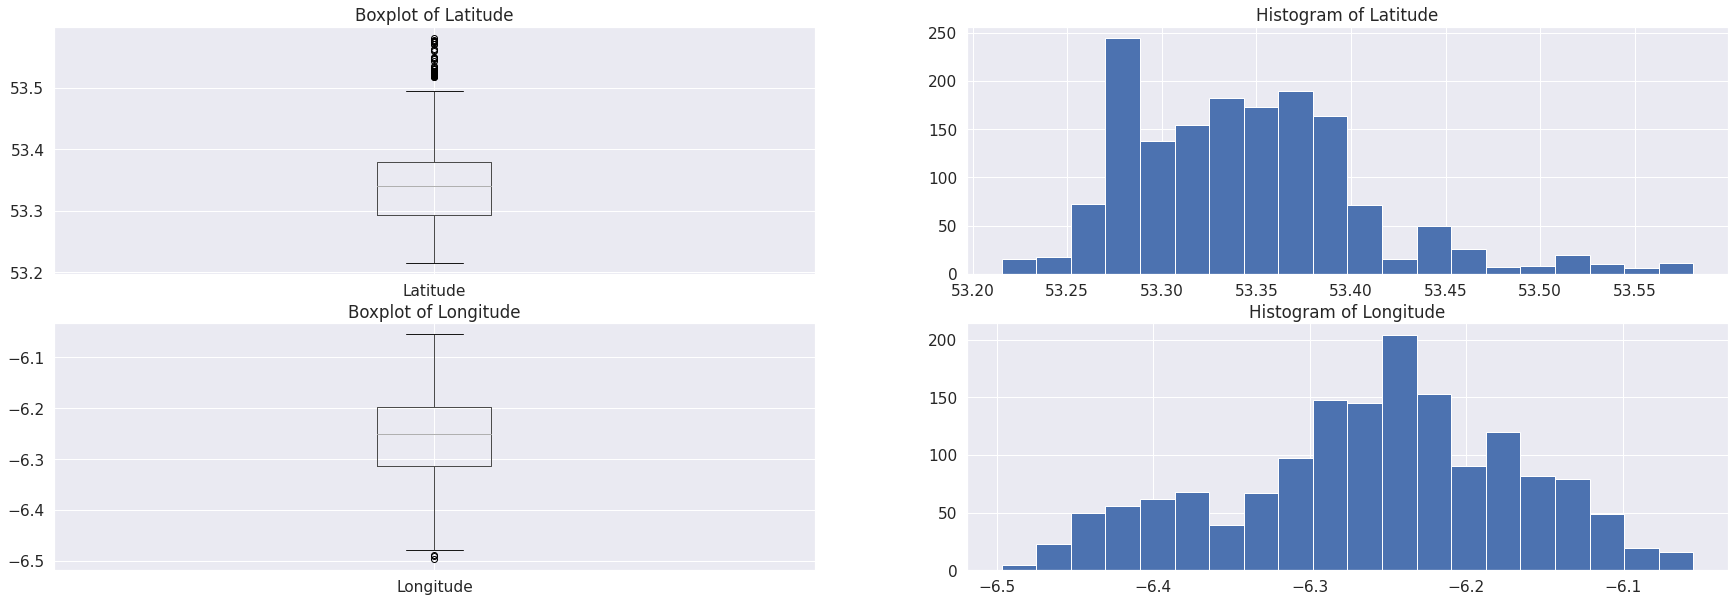

(1572, 17)


In [38]:
#Select features to include in plots
include_featues = ['Latitude','Longitude']

#run print function
print("Analysis of outliers")
plot_box_hist(train, include_featues)
print(train.shape)

print("After outliers have been removed")
for i in range(0, len(include_featues)): 
  train = remove_outliers(train,include_featues[i])

#run print function
plot_box_hist(train, include_featues)
print(train.shape)


In [39]:
# Drop  location inconsistent with county Dublin
InconsistentLongitude = train[train['Longitude'] > -6].index
train.drop(InconsistentLongitude, inplace=True)

Analysis of outliers


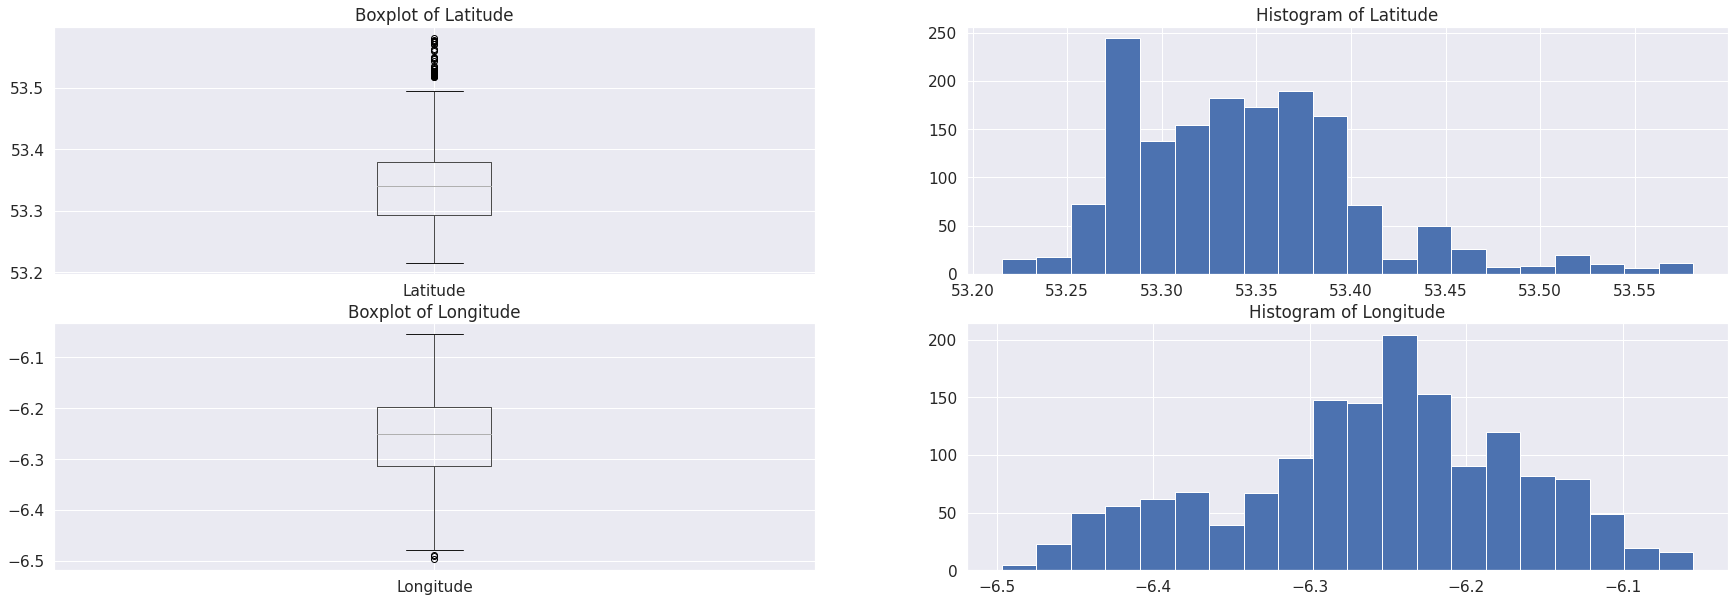

(1572, 17)
After outliers have been removed


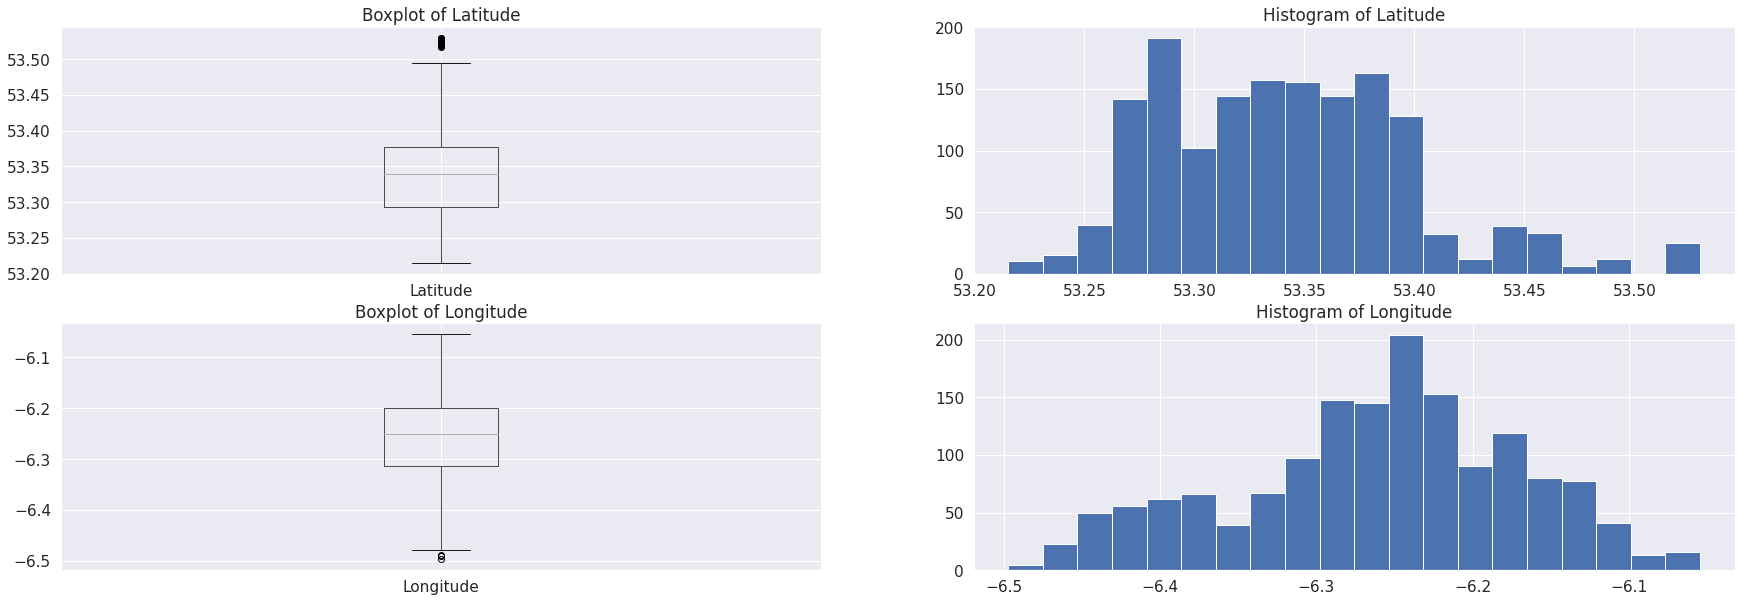

(1551, 17)


In [40]:
#Select features to include in plots
include_featues = ['Latitude','Longitude']

#run print function
print("Analysis of outliers")
plot_box_hist(train, include_featues)
print(train.shape)

print("After outliers have been removed")
for i in range(0, len(include_featues)): 
    train = remove_outliers(train,include_featues[i])

#run print function
plot_box_hist(train, include_featues)
print(train.shape)

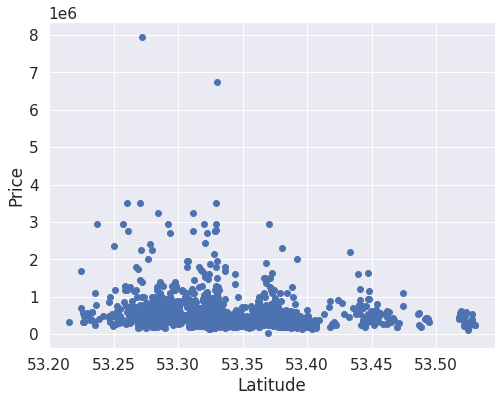

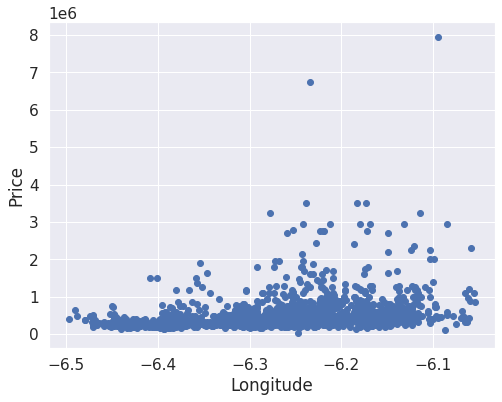

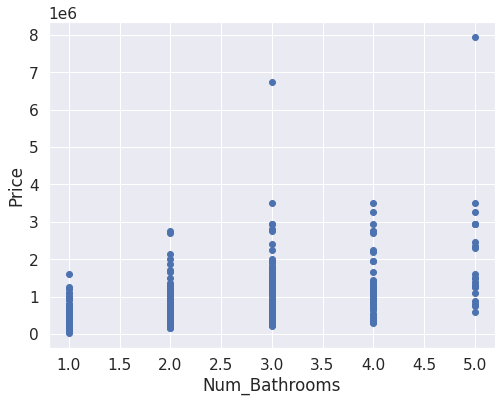

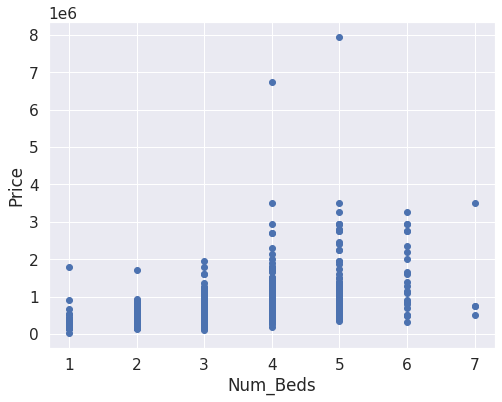

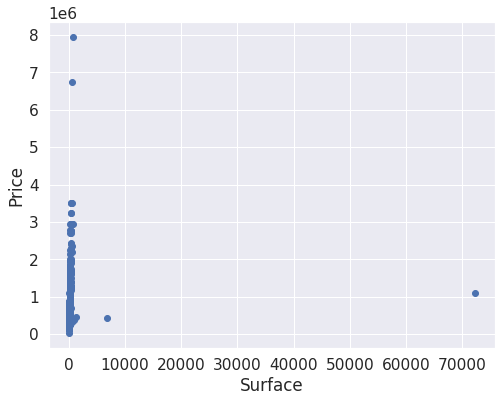

In [41]:
columns = ['Latitude','Longitude', 'Num_Bathrooms', 'Num_Beds', 'Surface']
for i in columns:
    fig = plt.figure(figsize=(8,6))
    plt.scatter(x=train[i], y=train['Price'])
    plt.ylabel('Price')
    plt.xlabel(i)
    plt.show()

In [42]:
# show first data frame rows 
train.head()

,Index,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price,Renovated,Attic,Large_garden,Luas_dart,Parking
0,1,Ongar,2,2,9,DNG are delighted to present to the market no....,None,53.396659,-6.438791,1,67.00,195000,False,False,False,False,False
1,2,North Strand,1,2,10,13 Northbrook Terrace is a charming red brick ...,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,5,95.97,425000,False,True,False,False,False
2,3,Stepaside,3,3,3,"Welcome to No. 6 Cotter Close, an immaculately...",Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,7,107.00,535000,False,False,False,False,True
3,4,Cabinteely,1,3,12,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,8,81.00,499000,False,True,False,False,True
5,6,Glasnevin,1,3,12,Property Team Lappin Estates take great pleasu...,None,53.380367,-6.279310,5,140.00,360000,False,False,False,False,False


In [43]:
# show first data frame rows 
test.head()

,Index,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Renovated,Attic,Large_garden,Luas_dart,Parking
0,1639,Milltown,2,2,8,OMD Estate Agents are delighted to present thi...,Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,4,65.0,False,False,False,False,True
1,1640,Glasnevin,2,5,12,Welcome to Saint Anthony No.214 Glasnevin Aven...,Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,7,142.0,False,True,False,False,True
2,1641,Dalkey,1,2,15,"Located in this ever popular road, on grounds ...",2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,8,80.0,False,False,True,True,True
3,1642,Raheny,4,4,2,DNG are delighted to represent the sale of thi...,Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,8,209.0,False,False,False,False,True
4,1643,Crumlin,2,3,14,A unique opportunity to acquire this red brick...,Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,6,108.0,False,False,False,True,True


In [44]:
print('New train shape')
print(train.shape)
print('New test shape') 
print(test.shape)

New train shape
(1551, 17)
New test shape
(702, 16)


# Preprocessing the textual features

In [45]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [46]:
# Using SnowballStemmer to remove stopwords and stemming
stemmer = SnowballStemmer('english', ignore_stopwords=False)

In [47]:
# Downloading a stopwords reference to filter out these words from the dataset
stop = set(stopwords.words('english'))

In [48]:
#text_features = ['Location', 'Description', 'Features']
#index_list = df_train_new['Index']
#index_list_test = df_test_new['Index']

In [49]:
# Set up the various components of the NLP processing code

from nltk.tokenize import word_tokenize  
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
nltk.download('punkt')
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


def NLP_processing(df,input_column,output_column):
  '''Set up the various components of the NLP processing code'''
  # 1 removing everything except alphabets
  df[output_column] = df[input_column].str.replace("[^a-zA-Z#]", " ")

  # 2 removing short words
  short_word = 4
  df[output_column] = df[output_column].apply(lambda x: ' '.join([w for w in x.split() if len(w)>short_word]))

  # 3 make all text lowercase
  df[output_column] = df[output_column].apply(lambda x: x.lower())



  swords = stopwords.words('english')

  # 5 tokenization
  tokenized_doc = df[output_column].apply(lambda x: x.split())

  # 6 remove stop-words
  tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in swords])


  return df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
clean_text = NLP_processing(train,'Description','Clean_description')
clean_text = NLP_processing(train,'Features','Clean_features')

clean_text_test = NLP_processing(test,'Description','Clean_description')
clean_text_test = NLP_processing(test,'Features','Clean_features')

In [51]:
clean_text[['Description','Clean_description','Features','Clean_features']].head()

,Description,Clean_description,Features,Clean_features
0,DNG are delighted to present to the market no....,delighted present market chipping bedroom apar...,None,
1,13 Northbrook Terrace is a charming red brick ...,northbrook terrace charming brick period seclu...,Bight and Spacious interior\nNumerous original...,bight spacious interior numerous original feat...
2,"Welcome to No. 6 Cotter Close, an immaculately...",welcome cotter close immaculately presented th...,Special Features\nLarge rear garden\nGenerous ...,special features large garden generous street ...
3,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,welcome sycamore enjoying premier address smal...,Wonderful 3 bed detached bungalow. \nAccom...,wonderful detached bungalow accommodation exte...
5,Property Team Lappin Estates take great pleasu...,property lappin estates great pleasure present...,None,


In [52]:
# create a dataframe from a word matrix
def wm2df(wm, feat_names):
    
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(), index=doc_names,
                      columns=feat_names)
    return(df)

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer object
cvec = CountVectorizer(lowercase=False)

# convert the documents into a document-term matrix
wm_train = cvec.fit_transform(clean_text['Clean_description'])


# retrieve the terms found in the corpora 
tokens = cvec.get_feature_names()

# convert the documents into a document-term matrix
wm_test = cvec.fit_transform(clean_text_test['Clean_description'])
tokens2 = cvec.get_feature_names()

In [54]:
# create a dataframe from the matrix
word_matrix = wm2df(wm_train, tokens)
word_matrix_test = wm2df(wm_test, tokens2)

In [55]:
word_count= pd.DataFrame(word_matrix.sum(), columns = ['counts'])
top50 = word_count.sort_values('counts', ascending=False)[:50]

# NATURAL LANGUAGE PROCESSING

In [56]:
train.Description

0       DNG are delighted to present to the market no....
1       13 Northbrook Terrace is a charming red brick ...
2       Welcome to No. 6 Cotter Close, an immaculately...
3       Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...
5       Property Team Lappin Estates take great pleasu...
                              ...                        
1632    PROPERTY PARTNERS OBRIEN SWAINE are proud to o...
1633    Built in c.1930 38 Stradbrook Road is a deligh...
1634    An impressive three-story family home superbly...
1635    DNG Lucan's leading estate agents are delighte...
1637    A superb opportunity awaits to acquire this be...
Name: Description, Length: 1551, dtype: object

In [57]:
train.Location

0                Ongar
1         North Strand
2            Stepaside
3           Cabinteely
5            Glasnevin
             ...      
1632    Harold's Cross
1633         Blackrock
1634         Blackrock
1635             Lucan
1637          Shankill
Name: Location, Length: 1551, dtype: object

In [58]:
train.Features

0                                                    None
1       Bight and Spacious interior\nNumerous original...
2       Special Features\nLarge rear garden\nGenerous ...
3       Wonderful 3 bed detached bungalow.     \nAccom...
5                                                    None
                              ...                        
1632                                                 None
1633    Extremely convenient location \nWheelchair acc...
1634    Gas fired central heating with underfloor heat...
1635                                                 None
1637    Turn key condition\nWood burning stove\nSlider...
Name: Features, Length: 1551, dtype: object

In [59]:
train.Type

0       1
1       5
2       7
3       8
5       5
       ..
1632    1
1633    9
1634    8
1635    7
1637    7
Name: Type, Length: 1551, dtype: int64

In [60]:
# TfidVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 500, max_df=0.5, smooth_idf=True)

In [61]:
# Concatenate description and features
X = vectorizer.fit_transform(clean_text['Clean_description'])  
x_test = vectorizer.fit_transform(clean_text_test['Clean_description'])  
X.shape

(1551, 500)

In [62]:
y = train['Price']
y.shape

(1551,)

In [63]:
#Train the classifier
# create a model
MNB = MultinomialNB()

# fit the training data
MNB.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [64]:
# Probability of a housing being expensive based on description
prob_expensive = MNB.predict_proba(X)
print('Probability of being expensive:',prob_expensive[:,0])

Probability of being expensive: [0.00022128 0.00044027 0.00043953 ... 0.00056596 0.00046432 0.00048201]


In [65]:
# add Probability of a housing being expensive to the dataframe
train['Prob_expensive'] = prob_expensive[:,0]

In [66]:
# Probability of a housing being expensive based on description
prob_expensive_test = MNB.predict_proba(x_test)
print('Probability of being expensive:',prob_expensive[:,0])

# add Probability of a housing being expensive to the dataframe
test['Prob_expensive'] = prob_expensive_test[:,0]

Probability of being expensive: [0.00022128 0.00044027 0.00043953 ... 0.00056596 0.00046432 0.00048201]


In [67]:
#from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [68]:
train.head()

,Index,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Type,Surface,Price,Renovated,Attic,Large_garden,Luas_dart,Parking,Clean_description,Clean_features,Prob_expensive
0,1,Ongar,2,2,9,DNG are delighted to present to the market no....,None,53.396659,-6.438791,1,67.00,195000,False,False,False,False,False,delighted present market chipping bedroom apar...,,0.000221
1,2,North Strand,1,2,10,13 Northbrook Terrace is a charming red brick ...,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,5,95.97,425000,False,True,False,False,False,northbrook terrace charming brick period seclu...,bight spacious interior numerous original feat...,0.000440
2,3,Stepaside,3,3,3,"Welcome to No. 6 Cotter Close, an immaculately...",Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,7,107.00,535000,False,False,False,False,True,welcome cotter close immaculately presented th...,special features large garden generous street ...,0.000440
3,4,Cabinteely,1,3,12,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,8,81.00,499000,False,True,False,False,True,welcome sycamore enjoying premier address smal...,wonderful detached bungalow accommodation exte...,0.000560
5,6,Glasnevin,1,3,12,Property Team Lappin Estates take great pleasu...,None,53.380367,-6.279310,5,140.00,360000,False,False,False,False,False,property lappin estates great pleasure present...,,0.000455


In [69]:
y_pred_train = MNB.predict(X_train)
#print('Training prediction\t', y_pred_train)

y_pred_val = MNB.predict(X_val)
#print('Validation prediction\t\t', y_pred_val)

In [70]:
# Determine accuracy on the training set
print("Training Accuracy: "+str(accuracy_score(y_train, y_pred_train)))

# Determine accuracy on the validation set
print("Validation Accuracy: "+str(accuracy_score(y_val, y_pred_val)))

Training Accuracy: 0.1695852534562212
Validation Accuracy: 0.21888412017167383


# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

Your comments, explanation, and references here.

In [71]:
# Create a copy of the data
df_train = train
df_test = test

In [72]:
# Specify the features we will use to train the model

featrain = ['Latitude', 'Longitude', 'Surface','Num_Beds','Num_Bathrooms','Price']
# dropna: remove missing values
df_subset_train = df_train[featrain].dropna(axis=0)

featest = ['Latitude', 'Longitude', 'Surface','Num_Beds','Num_Bathrooms']
df_subset_test  =  df_test[featest].dropna(axis=0)

# cost
#df_subset_cost = dfcost[dfcost.index.isin(df_subset_test.index)]

print(df_subset_train.shape)
print(df_subset_test.shape)
#print(df_subset_cost.shape)

(1551, 6)
(702, 5)


In [73]:
# train set, input columns
Xs_full_train = df_subset_train.iloc[:,0:-1].values 
# train set, output column, cost
ys_full_train = df_subset_train.iloc[:,-1].values

# test set, input columns
Xs_test = df_subset_test.iloc[:,0:].values 

print("Xs_train shape:", Xs_full_train.shape)
print("ys_train shape:", ys_full_train.shape)

print("Xs_test shape:", Xs_test.shape)
#print("y_test shape:", y_test.shape)

Xs_train shape: (1551, 5)
ys_train shape: (1551,)
Xs_test shape: (702, 5)


In [74]:
# Separate training data into predictors 'X' and target 'y'

# train set, input columns
X_train = df_subset_train.iloc[:,0:-1].values 
# train set, output column, cost
y_train = df_subset_train.iloc[:,-1].values.reshape(-1,1)   

# test set, input columns
X_test = df_subset_test.iloc[:,0:].values

In [75]:
#Split the training dataset into training and validation
Xs_train,Xs_val,ys_train,ys_val = train_test_split(Xs_full_train, ys_full_train, test_size=0.2)
ys_train = ys_train.reshape(-1,1)

print("X train shape:", Xs_train.shape)
print("y train shape:", ys_train.shape)
print("X validation shape:", Xs_val.shape)
print("y validation shape:", ys_val.shape)

print("X test shape:", Xs_test.shape)

X train shape: (1240, 5)
y train shape: (1240, 1)
X validation shape: (311, 5)
y validation shape: (311,)
X test shape: (702, 5)


In [76]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xn_test = xscaler.transform(Xss_test)

Xss_val = np.hstack([Xs_val,Xs_val[:,[2]]**2])
Xn_val = xscaler.transform(Xss_val)

ylog = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

#Do dot scale/transform the validation values
yn_val = ys_val

In [77]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Finished [100%]: Average Loss = 1,067


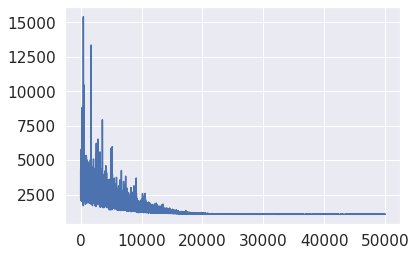

In [78]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);

In [79]:
# samples from the posterior
posterior = approximation.sample(5000)

In [80]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
#print("MAE = ",(np.mean(abs(y_pred_BLR - y_test))))
#print("MAPE = ",(np.mean(abs(y_pred_BLR - y_test) / y_test)))


In [81]:
df_1 = test['Index']
df_2 = pd.DataFrame(y_pred_BLR, columns=['Price_Full'])
full_test_predictions = pd.concat([df_1, df_2], axis=1)
full_test_predictions

,Index,Price_Full
0,1639,349668.836882
1,1640,572985.001271
2,1641,465878.065180
3,1642,880031.029297
4,1643,410418.343123
...,...,...
697,2336,225573.144612
698,2337,276956.172637
699,2338,518071.235721
700,2339,492893.508621


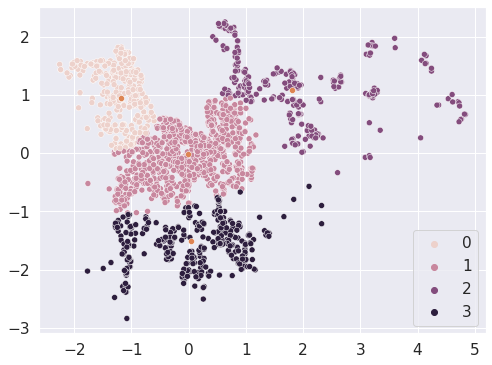

In [82]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)

# clustering by features latitude and longitude
ind=[0,1]
X_ind = np.vstack([Xn_train[:,ind],Xn_test[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)

plt.figure(figsize=(8,6))
labels = gmm.fit_predict(X_ind)
sns.scatterplot(x=X_ind[:,0], y=X_ind[:,1], hue=gmm.fit_predict(X_ind))
sns.scatterplot(x=gmm.means_[:,0],y=gmm.means_[:,1])

In [83]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))

{0: 221, 1: 614, 2: 160, 3: 245}

In [84]:
# test clusters
clusters_test = gmm.predict(Xn_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))

{0: 129, 1: 345, 2: 112, 3: 116}

In [85]:
# cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_test[clusters_test==0,:]

ylog0 = np.log(ys_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [86]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_test[clusters_test==1,:]
ylog1 = np.log(ys_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [87]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_test[clusters_test==2,:]
ylog2 = np.log(ys_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)

In [88]:
# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_test[clusters_test==3,:]
ylog3 = np.log(ys_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

In [89]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])

with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior0 = approximation.sample(5000)

Finished [100%]: Average Loss = 173.59


In [90]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, # 
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])
  
with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior1 = approximation.sample(5000)

Finished [100%]: Average Loss = 469.14


In [91]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  # linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])
    
with model_2:
  # iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior2 = approximation.sample(5000)

Finished [100%]: Average Loss = 166.99


In [92]:
# model_3
with pm.Model() as model3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn3.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])
    
with model3:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior3 = approximation.sample(5000)

Finished [100%]: Average Loss = 224.83


In [93]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

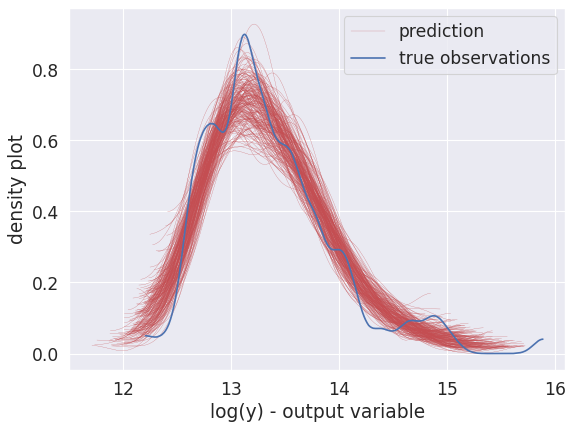

In [94]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))

figure(figsize=(8, 6), dpi=80)

for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")

az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

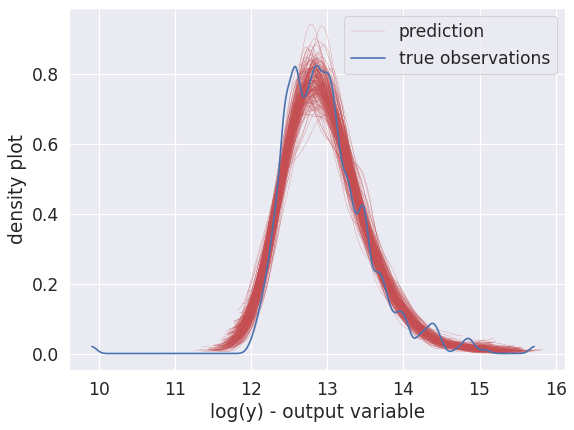

In [95]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))

figure(figsize=(8, 6), dpi=80)


for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

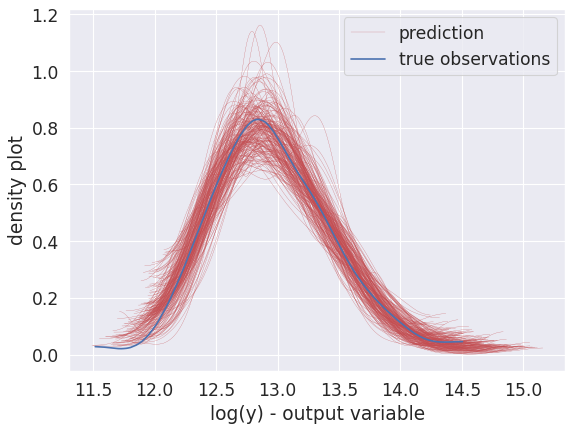

In [96]:
#Simulation
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))

figure(figsize=(8, 6), dpi=80)

for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

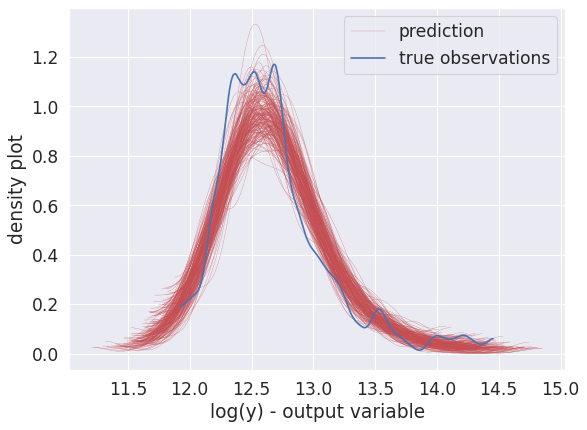

In [97]:
#Simulation
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200))

figure(figsize=(8, 6), dpi=80)

for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

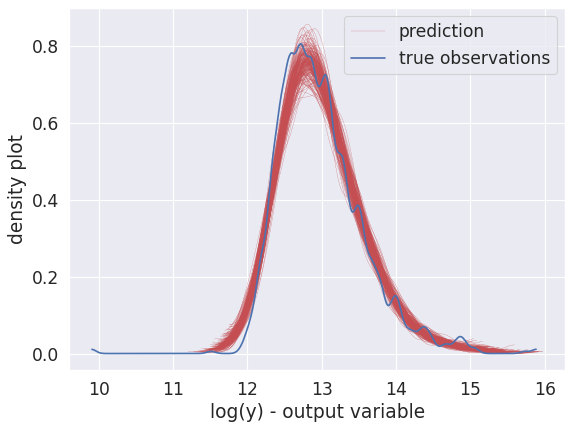

In [98]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)

figure(figsize=(8, 6), dpi=80)

# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)
                  ])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0, ylog1, ylog2, ylog3])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

In [99]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))

joint=np.hstack([y_pred_BLR0, y_pred_BLR1, y_pred_BLR2, y_pred_BLR3])

In [100]:
# Save predictions to predictions dataframe
df_1 = full_test_predictions
df_2 = pd.DataFrame(joint, columns=['Price_Piecewise'])
full_test_predictions = pd.concat([df_1, df_2], axis=1)
full_test_predictions

,Index,Price_Full,Price_Piecewise
0,1639,349668.836882,432370.826885
1,1640,572985.001271,409203.571234
2,1641,465878.065180,743475.493020
3,1642,880031.029297,429157.941437
4,1643,410418.343123,585789.213769
...,...,...,...
697,2336,225573.144612,242371.019974
698,2337,276956.172637,302144.691750
699,2338,518071.235721,255061.150434
700,2339,492893.508621,475743.792740


# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

In [101]:
# https://theano-pymc.readthedocs.io/en/latest/
import theano

# add a column of ones to include an intercept in the model
x1 = np.hstack([np.ones((Xn_train.shape[0],1)), Xn_train])
floatX = theano.config.floatX

l = 15
# Initialize random weights between each layer
# we do that to help the numerical algorithm that computes the posterior
init_1 = np.random.randn(x1.shape[1], l).astype(floatX)
init_out = np.random.randn(l).astype(floatX)

# pymc3 model as neural_network
with pm.Model() as neural_network:
    # we convert the data in theano type so we can do dot products with the correct type.
    ann_input = pm.Data('ann_input', x1)
    ann_output = pm.Data('ann_output', yn_train)
    # Priors 
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_1', 0, sigma=10,
                             shape=(x1.shape[1], l), testval=init_1)
    # Weights from hidden layer to output
    weights_2_out = pm.Normal('w_0', 0, sigma=10,
                              shape=(l,),testval=init_out)

    # Build neural-network using tanh activation function
    # Inner layer
    act_1 = pm.math.tanh(pm.math.dot(ann_input,weights_in_1))
    # Linear layer, like in Linear regression
    act_out = pm.Deterministic('act_out',pm.math.dot(act_1, weights_2_out))

    # standard deviation of noise
    sigma = pm.HalfCauchy('sigma',5)

    # Normal likelihood
    out = pm.Normal('out',
                       act_out,
                       sigma=sigma,
                       observed=ann_output[:,0])

In [102]:
# Approximated inference
param3 = 50000
VI = 'advi'  
OP = pm.adam 
LR = 0.001    

with neural_network:
    approx = pm.fit(param3, method=VI, obj_optimizer=pm.adam(learning_rate=LR))

Finished [100%]: Average Loss = 835.76


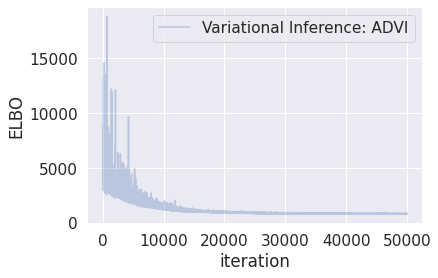

In [103]:
# plot 
pb.plot(approx.hist, label='Variational Inference: '+ VI.upper(), alpha=.3)
pb.legend(loc='upper right')
pb.ylabel('ELBO')
pb.xlabel('iteration');

In [104]:
# draw samples from variational posterior
D = 500
posterior = approx.sample(draws=D)

In [105]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((Xn_val.shape[0],1)), Xn_val])

y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred = np.array(y_pred).mean(axis=0)

In [106]:
# prediction
y_pred_BNN = np.exp(yscaler.inverse_transform(y_pred))

print("MAE = ",(np.mean(abs(y_pred - ys_val))))
print("MAPE = ",(np.mean(abs(y_pred - ys_val) / ys_val)))

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(ys_val, y_pred_BNN))
print("RMSE = ", rms)

MAE =  550946.7386024749
MAPE =  1.000000967650219
RMSE =  211622.09617461392


In [107]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((Xn_test.shape[0],1)), Xn_test])

y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred = np.array(y_pred).mean(axis=0)
final_y_pred=np.exp(yscaler.inverse_transform(y_pred))

In [108]:
# Save predictions
df_1 = full_test_predictions.copy()
df_2 = pd.DataFrame(final_y_pred, columns=['Price_NN'])
full_test_predictions = pd.concat([df_1, df_2], axis=1)
full_test_predictions

,Index,Price_Full,Price_Piecewise,Price_NN
0,1639,349668.836882,432370.826885,441932.059658
1,1640,572985.001271,409203.571234,572252.297355
2,1641,465878.065180,743475.493020,465904.532958
3,1642,880031.029297,429157.941437,841762.059654
4,1643,410418.343123,585789.213769,439823.127034
...,...,...,...,...
697,2336,225573.144612,242371.019974,207397.335380
698,2337,276956.172637,302144.691750,293821.955781
699,2338,518071.235721,255061.150434,455331.746006
700,2339,492893.508621,475743.792740,613885.329632


In [109]:
# Save dataset in GoogleDrive
full_test_predictions.to_csv(Path+"ET5003_Kaggle_David_Nolan_20146744.csv",index=True)

# SUMMARY

The Bayesian Neural Network was the best performing model on this property data.

The best run of my BNN achieved the following results:



1.   RMSLE = 0.22447.
2.   MAE =  550946.7386024749
3.   MAPE =  1.000000967650219
4.   RMSE =  211622.09617461392

Running the Piecewise Regression typically achieved the results slightly better, but closely comparable to the BLR.

From the top down my approach was focused on:

Data Preparation: My approach was (but not limited to)


1.   Finding number of nulls/NaNs in the dataset, 
2.   Looking for missing values, 
3.   Creating new features from keywords in description, 
4.   Dropping irrelevant columns, 
5.   Filling in missing BER_class values and replacing all ber values with equivalant decimal values, 
6.   Replacing property type with numbers, 
7.   Checking relationships between numerical variables removing outliers etc.
8.   Filtering out rows that do not contain data
9.   Detection and removal of outliers 

NLP: (approach but not limited to)
1. Preprocessed the the textual features
2. Removed stopwords and stemming using SnowballStemmer
3. Setup the barious components of the NLP processing code - removed everything except alphabets, removed short words, made all test lowercase, tokenization and removal of stop words
4. Cleaned the text
5. Created a dataframe from a word matrix
6. Converted the documents into a document-term matrix
7. Create a dataframe from the matrix
8. Used TfidVectorizer and concatenated description and features
9. Trained the classifier
10. Looked at the probability of housing being expensive based on description
11. Added probability of a housing being expensive to the dataframe
12. Train test split and determined accuracy on the training set



1.   Training Accuracy: 0.1695852534562212
2.   Validation Accuracy: 0.21888412017167383

NLP (Natural Language Processing) can be a powerful tool but here in this property dataset and the nature of type of writing in property agent blurb/marketing, the accuracy of using this type of analysis is relatively low. It was observed that adding minimally useful features does not necessarily improve the model performance; the BNN tended to perform worse with added minor features such as the locations; so the BNN runs were done without the locations. The addition of extra features needs to be trialled feature by feature to determine of there is an actual improvement. This was difficult in this dataset as the results were different every time presumably due to the division of the dataset into training & test.

Piecewise Regression (my approach but no limited to):
1. Specified the features I used to train the model
2. Separated training data into predictors 'X' and target 'y'
3. Split the training dataset into training and validation
4. Used StandardScaler() to normalize the features
5. Setup the model, number of iterations of the algorithms was set to 50000. 100.00% [50000/50000 00:05<00:00 Average Loss = 1,067]
6. Index and Price_Full table generated with all values
7. Trained gaussian mixture model 
8. Train and test clusters, simulation etc.
9. Generated table with Indext, Full_Price and Price_Piecewise
10. Piecewise was a close 2nd to Bayesian NN.

Bayesian NN:
1. .....
2. Set D to 500
3. Results: MAE =  550946.7386024749, MAPE =  1.000000967650219, RMSE =  211622.09617461392. 
4. Generated table which included the previous 2 prices and now also Price_NN.

